## Group NO: 55
### 21CS10086 : Swapnil Ghsoh
### 23MT61R15 : Vivekananda Giri
### Project Number : BSDT
### Project Name : Predicting the Position of Balance Scale

In [39]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [40]:
df = pd.read_csv('balance-scale.csv')
df

,B,1,1.1,1.2,1.3
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1
...,...,...,...,...,...
619,L,5,5,5,1
620,L,5,5,5,2
621,L,5,5,5,3
622,L,5,5,5,4


In [41]:
featureList = list(df.columns)
df_list = df.values.tolist()
df_list

[['R', 1, 1, 1, 2],
 ['R', 1, 1, 1, 3],
 ['R', 1, 1, 1, 4],
 ['R', 1, 1, 1, 5],
 ['R', 1, 1, 2, 1],
 ['R', 1, 1, 2, 2],
 ['R', 1, 1, 2, 3],
 ['R', 1, 1, 2, 4],
 ['R', 1, 1, 2, 5],
 ['R', 1, 1, 3, 1],
 ['R', 1, 1, 3, 2],
 ['R', 1, 1, 3, 3],
 ['R', 1, 1, 3, 4],
 ['R', 1, 1, 3, 5],
 ['R', 1, 1, 4, 1],
 ['R', 1, 1, 4, 2],
 ['R', 1, 1, 4, 3],
 ['R', 1, 1, 4, 4],
 ['R', 1, 1, 4, 5],
 ['R', 1, 1, 5, 1],
 ['R', 1, 1, 5, 2],
 ['R', 1, 1, 5, 3],
 ['R', 1, 1, 5, 4],
 ['R', 1, 1, 5, 5],
 ['L', 1, 2, 1, 1],
 ['B', 1, 2, 1, 2],
 ['R', 1, 2, 1, 3],
 ['R', 1, 2, 1, 4],
 ['R', 1, 2, 1, 5],
 ['B', 1, 2, 2, 1],
 ['R', 1, 2, 2, 2],
 ['R', 1, 2, 2, 3],
 ['R', 1, 2, 2, 4],
 ['R', 1, 2, 2, 5],
 ['R', 1, 2, 3, 1],
 ['R', 1, 2, 3, 2],
 ['R', 1, 2, 3, 3],
 ['R', 1, 2, 3, 4],
 ['R', 1, 2, 3, 5],
 ['R', 1, 2, 4, 1],
 ['R', 1, 2, 4, 2],
 ['R', 1, 2, 4, 3],
 ['R', 1, 2, 4, 4],
 ['R', 1, 2, 4, 5],
 ['R', 1, 2, 5, 1],
 ['R', 1, 2, 5, 2],
 ['R', 1, 2, 5, 3],
 ['R', 1, 2, 5, 4],
 ['R', 1, 2, 5, 5],
 ['L', 1, 3, 1, 1],


In [42]:
for sublist in df_list:
    sublist[0], sublist[-1] = sublist[-1], sublist[0]
df_list

[[2, 1, 1, 1, 'R'],
 [3, 1, 1, 1, 'R'],
 [4, 1, 1, 1, 'R'],
 [5, 1, 1, 1, 'R'],
 [1, 1, 1, 2, 'R'],
 [2, 1, 1, 2, 'R'],
 [3, 1, 1, 2, 'R'],
 [4, 1, 1, 2, 'R'],
 [5, 1, 1, 2, 'R'],
 [1, 1, 1, 3, 'R'],
 [2, 1, 1, 3, 'R'],
 [3, 1, 1, 3, 'R'],
 [4, 1, 1, 3, 'R'],
 [5, 1, 1, 3, 'R'],
 [1, 1, 1, 4, 'R'],
 [2, 1, 1, 4, 'R'],
 [3, 1, 1, 4, 'R'],
 [4, 1, 1, 4, 'R'],
 [5, 1, 1, 4, 'R'],
 [1, 1, 1, 5, 'R'],
 [2, 1, 1, 5, 'R'],
 [3, 1, 1, 5, 'R'],
 [4, 1, 1, 5, 'R'],
 [5, 1, 1, 5, 'R'],
 [1, 1, 2, 1, 'L'],
 [2, 1, 2, 1, 'B'],
 [3, 1, 2, 1, 'R'],
 [4, 1, 2, 1, 'R'],
 [5, 1, 2, 1, 'R'],
 [1, 1, 2, 2, 'B'],
 [2, 1, 2, 2, 'R'],
 [3, 1, 2, 2, 'R'],
 [4, 1, 2, 2, 'R'],
 [5, 1, 2, 2, 'R'],
 [1, 1, 2, 3, 'R'],
 [2, 1, 2, 3, 'R'],
 [3, 1, 2, 3, 'R'],
 [4, 1, 2, 3, 'R'],
 [5, 1, 2, 3, 'R'],
 [1, 1, 2, 4, 'R'],
 [2, 1, 2, 4, 'R'],
 [3, 1, 2, 4, 'R'],
 [4, 1, 2, 4, 'R'],
 [5, 1, 2, 4, 'R'],
 [1, 1, 2, 5, 'R'],
 [2, 1, 2, 5, 'R'],
 [3, 1, 2, 5, 'R'],
 [4, 1, 2, 5, 'R'],
 [5, 1, 2, 5, 'R'],
 [1, 1, 3, 1, 'L'],


## Task-1
#####  The dataset is not divided into train, validation and test sets. The first task is to randomly partition the train dataset into train, validation and test sets using 70-10-20 split.


In [43]:
df_train, df_val_test = train_test_split(df_list,test_size=0.3,random_state=42)
df_val, df_test = train_test_split(df_val_test,test_size=0.66,random_state=32)

##### Entropy of a partition

In [44]:
def calculate_entropy(examples):
    class_counts = {}
    for example in examples:
        class_label = example[-1]
        class_counts[class_label] = class_counts.get(class_label, 0) + 1
    class_counts_dict = class_counts
    total_examples = float(len(examples))
    entropy = 0
    for class_label, count in class_counts_dict.items():
        probability = count / total_examples
        entropy -= probability * math.log(probability, 2)

    return entropy


##### Entropy decrease in Partitioning

In [45]:
def calculate_information_gain(left_data, right_data, current_entropy):
    left_length = len(left_data)
    right_length = len(right_data)
    prob_left = float(left_length) / (left_length + right_length)
    prob_right = 1 - prob_left
    info_gain = current_entropy - (prob_left * calculate_entropy(left_data) + prob_right * calculate_entropy(right_data))
    return info_gain


##### Node Structure

In [46]:
class DeciderNode:
    def __init__(self, question, trueChild, falseChild, height, id, training_examples):
        self.trueChild = trueChild
        self.falseChild = falseChild
        self.training_examples = training_examples
        self.question = question
        self.height = height
        self.id = id

class LeafNode:
    def __init__(self, training_examples, id, height):
        self.height = height
        self.id = id
        self.count_class_diff = self.count_classes(training_examples)
        self.initial_pred_class = self.maxClass()

    def maxClass(self):
        try:
            maximum = max(self.count_class_diff.values())
            cls = [key for key, value in self.count_class_diff.items() if value == maximum][0]
        except (TypeError, ValueError, IndexError):
            cls = None
        return cls
    def count_classes(self,examples):
        try:
            class_counts = {}
            for example in examples:
                class_label = example[-1]
                class_counts[class_label] = class_counts.get(class_label, 0) + 1
            return class_counts
        except (IndexError, TypeError):
            return {}


def makeLeafNodes(node, leafNodes=[]):
    if isinstance(node, LeafNode):
        leafNodes.append(node)
        return
    makeLeafNodes(node.trueChild, leafNodes)
    makeLeafNodes(node.falseChild, leafNodes)

    return leafNodes

def makeInternalNodes(node, internal_nodes=None):
    if internal_nodes is None:
        internal_nodes = []

    if isinstance(node, LeafNode):
        return

    makeInternalNodes(node.falseChild, internal_nodes)
    makeInternalNodes(node.trueChild, internal_nodes)

    internal_nodes.append(node)
    
    return internal_nodes

##### Finding the best possible spilt 

In [47]:
class Decision:

    def __init__(self, columnName, questionValue, featureList):
        self.columnName = columnName
        self.questionValue = questionValue
        self.featureList = featureList
    
    def checkNumeric(self, var):
        flag = False
        if isinstance(var, int):
            flag = True
        elif isinstance(var, float):
            flag = True
        return flag
    
    def check_condition(self, training_example):
        actual_value = training_example[self.columnName]
        if self.checkNumeric(actual_value):
            if actual_value >= self.questionValue:
                return True
            else:
                return False
        else:
            if actual_value == self.questionValue:
                return True
            else:
                return False

    def __repr__(self):
        condition = "=="
        if self.checkNumeric(self.questionValue):
            condition = ">="
        return "Is %s %s %s?" % (
            self.featureList[self.columnName], condition, str(self.questionValue))


def best_split(training_examples, featureList):
    bestInfoGain = 0  
    bestQuestion = None  
    currentEntropy = calculate_entropy(training_examples)
    numFeatures = len(training_examples[0]) - 1  

    for feature in range(numFeatures): 
        
        unique_values = set()
        for row in training_examples:
            unique_values.add(row[feature])

        for value in unique_values:

            question = Decision(feature, value, featureList)

            true_examples = []
            false_examples = []
    
            for example in training_examples:
                if question.check_condition(example):
                    true_examples.append(example)
                else:
                    false_examples.append(example)

            if len(true_examples) == 0 or len(false_examples) == 0:
                continue

            infoGain = calculate_information_gain(true_examples, false_examples, currentEntropy)

            if infoGain > bestInfoGain:
                bestInfoGain = infoGain
                bestQuestion = question

    return bestInfoGain, bestQuestion

##### Predict the class of a particular row according to the model

In [48]:
def predicted_output_class(example, node):

    if isinstance(node, LeafNode):
        return node.initial_pred_class
    
    if node.question.check_condition(example):
        return predicted_output_class(example, node.trueChild)
    else:
        return predicted_output_class(example, node.falseChild)

In [49]:
def printDecisionTree(node, tabSpace=""):

    if isinstance(node, LeafNode):
        print(tabSpace + "Leaf Node ID: " + str(node.id) + " Prediction: " +
              str(node.count_class_diff) + " Class: " + str(node.initial_pred_class))
        return

    # print question at that node
    print(tabSpace + str(node.question) + " id: " +
          str(node.id) + " height: " + str(node.height))

    # recursive call on true child
    print(tabSpace + '>>> True:')
    printDecisionTree(node.trueChild, tabSpace + "  ")

    # recursive call on false child
    print(tabSpace + '>>> False:')
    printDecisionTree(node.falseChild, tabSpace + "  ")


In [50]:
def printLeafNode(counts):
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs

In [51]:
def calculateAccuracy(training_examples, node):

    count = len(training_examples)
    if count == 0:
        return 0

    accuracy = 0
    for row in training_examples:
        if row[-1] == predicted_output_class(row, node):
            accuracy += 1
    return round(accuracy/count, 2)

## Task-2

##### Part-a: Implement the standard ID3 decision tree algorithm as discussed in class, using INFORMATION GAIN to choose which attribute to split at each point.

In [52]:
def makeDecisionTreeWithoutPruning(training_examples, featureList, height=0, id=0):

    if len(training_examples) < 2:
        return LeafNode(training_examples, id, height)
    
    bestInfoGain, bestQuestion = best_split(training_examples, featureList)

    if bestInfoGain == 0:
        return LeafNode(training_examples, id, height)

    true_examples = []
    false_examples = []

    for example in training_examples:
        if bestQuestion.check_condition(example):
            true_examples.append(example)
        else:
            false_examples.append(example)

    trueChild = makeDecisionTreeWithoutPruning(true_examples, featureList, height + 1, 2 * id + 2)

    falseChild = makeDecisionTreeWithoutPruning(false_examples, featureList, height + 1, 2 * id + 1)

    return DeciderNode(bestQuestion, trueChild, falseChild, height, id, training_examples)

##### Part-b: Train the implemented model using train split of the data.

In [53]:
# make decision tree
tree_without_pruning = makeDecisionTreeWithoutPruning(df_train, featureList)
internalNodes = makeInternalNodes(tree_without_pruning)

acc_without_pruning = calculateAccuracy(df_test, tree_without_pruning)

print("\nAccuracy of decision tree before pruning: " + str(acc_without_pruning) + "\n")
printDecisionTree(tree_without_pruning)


Accuracy of decision tree before pruning: 0.82

Is 1 >= 3? id: 0 height: 0
>>> True:
  Is 1.1 >= 3? id: 2 height: 1
  >>> True:
    Is B >= 3? id: 6 height: 2
    >>> True:
      Is 1.2 >= 3? id: 14 height: 3
      >>> True:
        Is B >= 4? id: 30 height: 4
        >>> True:
          Is 1 >= 4? id: 62 height: 5
          >>> True:
            Is 1.1 >= 4? id: 126 height: 6
            >>> True:
              Is 1.2 >= 4? id: 254 height: 7
              >>> True:
                Is B >= 5? id: 510 height: 8
                >>> True:
                  Is 1 >= 5? id: 1022 height: 9
                  >>> True:
                    Is 1.2 >= 5? id: 2046 height: 10
                    >>> True:
                      Leaf Node ID: 4094 Prediction: {'B': 1} Class: B
                    >>> False:
                      Leaf Node ID: 4093 Prediction: {'L': 1} Class: L
                  >>> False:
                    Leaf Node ID: 2045 Prediction: {'R': 3} Class: R
                >>> False:


## Task-3 : Revised Decision Tree Model with Pruning

In [54]:
def makeDecisionTree(training_examples, featureList,h=10, height=0, id=0):

    if len(training_examples) < 2:
        return LeafNode(training_examples, id, height)
    
    if (height > h):
        return LeafNode(training_examples, id, height)
    
    bestInfoGain, bestQuestion = best_split(training_examples, featureList)

    if bestInfoGain == 0:
        return LeafNode(training_examples, id, height)

    true_examples = []
    false_examples = []

    for example in training_examples:
        if bestQuestion.check_condition(example):
            true_examples.append(example)
        else:
            false_examples.append(example)

    trueChild = makeDecisionTree(true_examples, featureList, h, height + 1, 2 * id + 2)

    falseChild = makeDecisionTree(false_examples, featureList, h, height + 1, 2 * id + 1)

    return DeciderNode(bestQuestion, trueChild, falseChild, height, id, training_examples)

def pruneDecisionTree(node, pruneNodeId):
    if isinstance(node, LeafNode):
        return node

    if int(node.id) == pruneNodeId:
        return LeafNode(node.training_examples, node.id, node.height)
    node.trueChild = pruneDecisionTree(node.trueChild, pruneNodeId)
    node.falseChild = pruneDecisionTree(node.falseChild, pruneNodeId)
    return node

def makeDecisionTreeWithPruning(training_examples, featureList,h=10):
    d_tree = makeDecisionTree(df_train, featureList, h)
    maxAcc=0
    pruneNodeId = -1
    for internalNode in internalNodes:
        if internalNode.id != 0:
            pruneDecisionTree(d_tree, internalNode.id)
            newAcc = calculateAccuracy(df_val, d_tree)
            if newAcc > maxAcc:
                maxAcc = newAcc
                pruneNodeId = internalNode.id
            d_tree = makeDecisionTree(df_train, featureList, h)
            if maxAcc == 1:
                break

    if pruneNodeId != -1:
        d_tree = makeDecisionTree(df_train, featureList, h)
        pruneDecisionTree(d_tree, [pruneNodeId])
    else:
        d_tree = makeDecisionTree(df_train, featureList, h)
    return d_tree


##### Part-a: To prune the tree, we have used Reduced Error Pruning. For pruning, we have used the accuracy on validation split for selecting the best pruned tree.

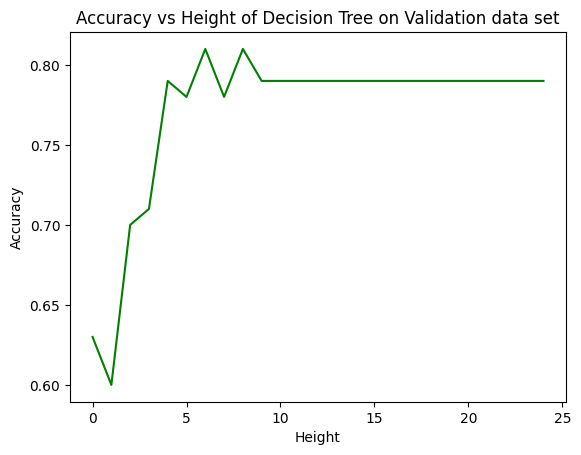

In [55]:
# plot height vs accuracy
accuracyList = []
heights = 25
tree_with_pruning = None
max_accuracy = 0
for i in range(heights):
    tree = makeDecisionTreeWithPruning(df_train, featureList, i)
    Acc = calculateAccuracy(df_val, tree)
    if(Acc > max_accuracy) :
        tree_with_pruning = tree
        max_accuracy = Acc
    accuracyList.append(Acc)

plt.xlabel('Height')
plt.ylabel('Accuracy')
plt.title(f'Accuracy vs Height of Decision Tree on Validation data set')
plt.plot(list(range(heights)), accuracyList, '-g')

In [56]:
acc_with_pruning = calculateAccuracy(df_test, tree_with_pruning)

print("\nAccuracy of decision tree after pruning: " + str(acc_with_pruning) + "\n")
printDecisionTree(tree_with_pruning)


Accuracy of decision tree after pruning: 0.81

Is 1 >= 3? id: 0 height: 0
>>> True:
  Is 1.1 >= 3? id: 2 height: 1
  >>> True:
    Is B >= 3? id: 6 height: 2
    >>> True:
      Is 1.2 >= 3? id: 14 height: 3
      >>> True:
        Is B >= 4? id: 30 height: 4
        >>> True:
          Is 1 >= 4? id: 62 height: 5
          >>> True:
            Is 1.1 >= 4? id: 126 height: 6
            >>> True:
              Leaf Node ID: 254 Prediction: {'L': 11, 'B': 3, 'R': 3} Class: L
            >>> False:
              Leaf Node ID: 253 Prediction: {'R': 6, 'B': 2, 'L': 1} Class: R
          >>> False:
            Is 1.2 >= 4? id: 125 height: 6
            >>> True:
              Leaf Node ID: 252 Prediction: {'R': 9} Class: R
            >>> False:
              Leaf Node ID: 251 Prediction: {'B': 2, 'R': 1} Class: B
        >>> False:
          Is 1.2 >= 5? id: 61 height: 5
          >>> True:
            Is 1 >= 4? id: 124 height: 6
            >>> True:
              Leaf Node ID: 250 Pre

## Task-4: Classification report

In [57]:
def calculatePrecision(training_examples, model,cls):

    count = len(training_examples)
    if count == 0:
        return 0

    true_postive = 0
    false_positive = 0
    for row in training_examples:
        if cls == predicted_output_class(row, model):
            if cls == row[-1]:
                true_postive+=1
            else:
                false_positive+=1
    return round(true_postive/(true_postive+false_positive), 2)

def calculateRecall(training_examples, model,cls):

    count = len(training_examples)
    if count == 0:
        return 0

    true_postive = 0
    false_negative = 0
    for row in training_examples:
        if cls == row[-1]:
            if cls == predicted_output_class(row,model):
                true_postive+=1
            else:
                false_negative+=1

    return round(true_postive/(true_postive+false_negative), 2)

def calculatef1score(training_examples, model,cls):
    p=calculatePrecision(training_examples,model,cls)
    r=calculateRecall(training_examples,model,cls)
    return round(2*(p*r)/(p+r), 2)

##### Precision with pruning

In [58]:
print(calculatePrecision(df_test,tree_with_pruning,'L'))
print(calculatePrecision(df_test,tree_with_pruning,'R'))
print(calculatePrecision(df_test,tree_with_pruning,'B'))

0.81
0.96
0.09


##### Recall with pruning

In [59]:
print(calculateRecall(df_test,tree_with_pruning,'L'))
print(calculateRecall(df_test,tree_with_pruning,'R'))
print(calculateRecall(df_test,tree_with_pruning,'B'))

0.91
0.81
0.11


##### f1-score with pruning

In [60]:
print(calculatef1score(df_test,tree_with_pruning,'L'))
print(calculatef1score(df_test,tree_with_pruning,'R'))
print(calculatef1score(df_test,tree_with_pruning,'B'))

0.86
0.88
0.1


#### Classfication report with pruning

In [61]:
from sklearn.metrics import accuracy_score, classification_report
y_pred_with_pruning=[]
for row in df_test:
    y_pred_with_pruning.append(predicted_output_class(row,tree_with_pruning))
y_test = [sublist[-1] for sublist in df_test]
print(classification_report(y_test, y_pred_with_pruning))



              precision    recall  f1-score   support

           B       0.09      0.11      0.10         9
           L       0.81      0.91      0.86        57
           R       0.96      0.81      0.88        59

    accuracy                           0.81       125
   macro avg       0.62      0.61      0.61       125
weighted avg       0.83      0.81      0.81       125



##### Precision without pruning

In [62]:
print(calculatePrecision(df_test,tree_without_pruning,'L'))
print(calculatePrecision(df_test,tree_without_pruning,'R'))
print(calculatePrecision(df_test,tree_without_pruning,'B'))

0.88
0.94
0.13


##### Recall without pruning

In [63]:
print(calculateRecall(df_test,tree_without_pruning,'L'))
print(calculateRecall(df_test,tree_without_pruning,'R'))
print(calculateRecall(df_test,tree_without_pruning,'B'))

0.88
0.85
0.22


##### f1-score without pruning

In [64]:
print(calculatef1score(df_test,tree_without_pruning,'L'))
print(calculatef1score(df_test,tree_without_pruning,'R'))
print(calculatef1score(df_test,tree_without_pruning,'B'))

0.88
0.89
0.16


#### Classification report without pruning

In [65]:
from sklearn.metrics import accuracy_score, classification_report
y_pred_without_pruning=[]
for row in df_test:
    y_pred_without_pruning.append(predicted_output_class(row,tree_without_pruning))
y_test = [sublist[-1] for sublist in df_test]
print(classification_report(y_test, y_pred_without_pruning))

              precision    recall  f1-score   support

           B       0.13      0.22      0.17         9
           L       0.88      0.88      0.88        57
           R       0.94      0.85      0.89        59

    accuracy                           0.82       125
   macro avg       0.65      0.65      0.65       125
weighted avg       0.85      0.82      0.83       125



## Verification with scikit learn

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data
df = pd.read_csv('balance-scale.csv')  # Replace 'your_data.csv' with the actual file path

# Separate features and target variable
X = df.iloc[:,1:] # Replace 'target_column' with the name of your target column
y = df.iloc[:,0]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')  # Using information gain (entropy)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Other classification measures
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8031914893617021
Classification Report:
              precision    recall  f1-score   support

           B       0.08      0.17      0.11        12
           L       0.87      0.84      0.85        87
           R       0.96      0.85      0.90        89

    accuracy                           0.80       188
   macro avg       0.64      0.62      0.62       188
weighted avg       0.86      0.80      0.83       188

